In [1]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats

# Visualization
import seaborn as sb

# Similarity
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
ratings = pd.read_csv("./archive/rating_complete.csv")
ratings

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
...,...,...,...
57633273,353404,502,8
57633274,353404,987,4
57633275,353404,225,8
57633276,353404,243,7


In [3]:
anime_df = pd.read_csv("./archive/anime.csv")
anime_df["anime_id"] = anime_df["MAL_ID"]
anime_df

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,anime_id
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,5
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,6
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,7
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48481
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48483
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48488
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48491


In [4]:
# Distinct animes
ratings['anime_id'].nunique()

16872

In [5]:
# Downsize the ratings so model runs faster
ratings_reduced = ratings.sample(frac=0.01)
print(ratings_reduced)
print(ratings['anime_id'].nunique())
print(ratings['user_id'].value_counts())

          user_id  anime_id  rating
56121093   343978      5493       6
18289242   112327     28907       8
7584183     46510     13655       8
11976918    73363      8557       8
57163387   350478     22097       6
...           ...       ...     ...
21624212   132749       207       4
27450972   169033      2795       5
28590283   175894       934      10
5133947     31522     31240      10
41007549   251775        45       9

[576333 rows x 3 columns]
16872
189037    15455
162615    14864
68042     13462
283786    12778
259790     9996
          ...  
201316        1
201300        1
97555         1
201293        1
137466        1
Name: user_id, Length: 310059, dtype: int64


In [74]:
df = pd.merge(ratings, anime_df[['anime_id','Name', 'Genres']], on="anime_id", how="inner")
# df = ratings_reduced.merge(anime_df[['Name', 'Genres']])
df

,user_id,anime_id,rating,Name,Genres
0,0,430,9,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
1,6,430,8,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
2,18,430,10,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
3,19,430,8,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
4,33,430,4,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
...,...,...,...,...,...
57633273,315549,38853,1,Ex-Arm,"Action, Sci-Fi, Ecchi, Seinen"
57633274,350024,38853,10,Ex-Arm,"Action, Sci-Fi, Ecchi, Seinen"
57633275,311855,39435,6,Oshiri Tantei Movie 1: Curry Naru Jiken,"Mystery, Comedy, Kids, Fantasy"
57633276,334473,35746,4,6 Lovers,"Comedy, Drama, Romance, School, Shounen Ai, Sl..."


In [75]:
print(df["Name"].value_counts())
print(df["user_id"].value_counts())

Death Note                                                   182375
Shingeki no Kyojin                                           169794
Sword Art Online                                             161192
Angel Beats!                                                 141127
One Punch Man                                                138924
                                                              ...  
Sonotoki Kimi wa?: Ryouta to Pikari no Jishin Bousai Gaku         1
Nakayoshi Jitensha                                                1
Jingju Mao Zhi Cheng Feng Polang                                  1
Jingju Mao                                                        1
Nan-chan no Koutsuu Anzen                                         1
Name: Name, Length: 16870, dtype: int64
189037    15455
162615    14864
68042     13462
283786    12778
259790     9996
          ...  
136422        1
213994        1
196985        1
190834        1
206653        1
Name: user_id, Length: 310059, dtype

In [99]:
# only users with > 10 ratings
df_reduced = df.groupby("user_id").filter(lambda x: len(x) > 1000)
df_reduced

# print("RATINGS BY USER")
# print(print(df_reduced['user_id'].value_counts()))

,user_id,anime_id,rating,Name,Genres
42,326,430,9,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
61,446,430,7,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
121,853,430,8,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
124,890,430,6,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
133,943,430,7,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
...,...,...,...,...,...
57633267,283786,45448,6,Dou Hun Wei Zhi Xuan Yue Qiyuan IV,"Action, Fantasy"
57633268,283786,42465,6,Guan Hai Ce Zhi Tie Qi Xiong Guan,"Action, Military, Historical, Martial Arts, Fa..."
57633269,289506,41277,4,Rainbow Ruby,"Kids, Fantasy"
57633271,308285,40389,8,Uchuu Senkan Yamato 2205: Aratanaru Tabidachi,"Action, Military, Sci-Fi, Space, Drama"


In [86]:
print(df_reduced["Name"].value_counts())
print(df_reduced["user_id"].value_counts())


Angel Beats!                                     13730
Sword Art Online                                 13722
Shingeki no Kyojin                               13679
Toradora!                                        13272
No Game No Life                                  13227
                                                 ...  
Kaiketsu Zorori no Kyoufu no Hanayome Sakusen        1
Yakusoku no Neverland 2nd Season                     1
Xiao Hua Xian 3rd Season: Shou Hu Tian Shi           1
Bite-Choicar                                         1
Nan-chan no Koutsuu Anzen                            1
Name: Name, Length: 16834, dtype: int64
189037    15455
162615    14864
68042     13462
283786    12778
259790     9996
          ...  
183464      601
152412      601
48427       601
45420       601
122424      601
Name: user_id, Length: 15509, dtype: int64


In [106]:
df_reduced_2 = df_reduced.groupby("Name").filter(lambda x: len(x) > 2500)
df_reduced_2

,user_id,anime_id,rating,Name,Genres
42,326,430,9,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
61,446,430,7,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
121,853,430,8,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
124,890,430,6,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
133,943,430,7,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
...,...,...,...,...,...
56909790,209502,35102,5,Hinamatsuri,"Historical, Kids"
56909791,251983,35102,6,Hinamatsuri,"Historical, Kids"
56909793,307749,35102,10,Hinamatsuri,"Historical, Kids"
56909795,321704,35102,7,Hinamatsuri,"Historical, Kids"


In [107]:
print(df_reduced_2["Name"].value_counts())
print(df_reduced_2["user_id"].value_counts())

Angel Beats!                                                                                          4078
Sword Art Online                                                                                      4028
Shingeki no Kyojin                                                                                    4011
No Game No Life                                                                                       3937
Toradora!                                                                                             3921
                                                                                                      ... 
Tsurezure Children                                                                                    2509
Motto To LOVE-Ru                                                                                      2509
Ao no Exorcist: Kyoto Fujouou-hen                                                                     2508
Hinamatsuri                          

In [109]:
df_reduced = df_reduced_2

In [110]:
# Average rating by movie with number of ratings
df2 = df_reduced.groupby('anime_id', as_index=False)['rating'].mean()
df3 = df_reduced.groupby('anime_id', as_index=False)['Name'].value_counts()
ratings_plus100 = df3.merge(df2, on='anime_id')
ratings_plus100.sort_values(by="count", ascending=False).head()



,anime_id,Name,count,rating
92,6547,Angel Beats!,4078,8.131192
163,11757,Sword Art Online,4028,7.327458
207,16498,Shingeki no Kyojin,4011,8.297681
231,19815,No Game No Life,3937,8.177292
69,4224,Toradora!,3921,8.234124


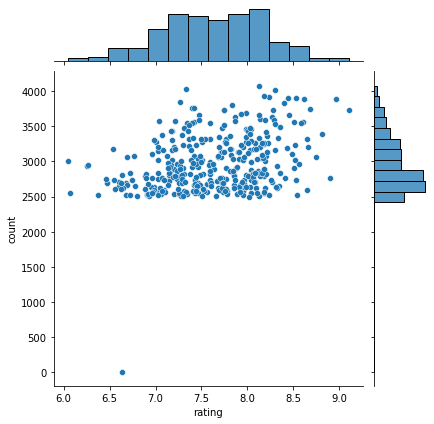

In [111]:
# Visualize
sb.jointplot(x='rating', y='count', data=ratings_plus100)

After filtering the remaining data has 285440 users that reviewed 5223 unique animes for a total of 5527766 reviews

In [112]:
# Number of users
print("The ratings data set has ", df_reduced["user_id"].nunique(), " unique users")

# Number of animes
print("The ratings data set has ", df_reduced["anime_id"].nunique(), " unique animes")

The ratings data set has  4444  unique users
The ratings data set has  372  unique animes


In [113]:
# Create user_item matrix
matrix = df_reduced.pivot_table(index="Name", columns="user_id", values='rating')
matrix.head()
# print(df.head())
# print(df_reduced.head())


user_id,326,446,478,781,853,890,912,943,985,1177,...,352660,352669,352761,352832,352835,352922,352924,352930,353304,353325
Name,,,,,,,,,,,,,,,,,,,,,
3-gatsu no Lion,8.0,NaN,9.0,7.0,NaN,NaN,NaN,NaN,9.0,7.0,...,8.0,8.0,10.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Absolute Duo,7.0,NaN,7.0,NaN,NaN,NaN,5.0,9.0,7.0,NaN,...,5.0,NaN,NaN,1.0,5.0,NaN,NaN,NaN,4.0,NaN
Accel World,8.0,NaN,NaN,8.0,NaN,NaN,NaN,10.0,10.0,8.0,...,6.0,7.0,7.0,NaN,7.0,NaN,NaN,8.0,5.0,9.0
Aho Girl,7.0,NaN,NaN,7.0,NaN,NaN,8.0,9.0,9.0,6.0,...,6.0,6.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
Air,NaN,8.0,NaN,NaN,NaN,9.0,NaN,NaN,8.0,8.0,...,NaN,7.0,7.0,NaN,NaN,6.0,NaN,9.0,NaN,NaN


# Data Normalization
Using mean-centered cosine similarity

In [114]:
# Normalize matrix
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis=0)
matrix_norm.head()


user_id,326,446,478,781,853,890,912,943,985,1177,...,352660,352669,352761,352832,352835,352922,352924,352930,353304,353325
Name,,,,,,,,,,,,,,,,,,,,,
3-gatsu no Lion,-0.104396,NaN,0.895604,-1.104396,NaN,NaN,NaN,NaN,0.895604,-1.104396,...,-0.104396,-0.104396,1.895604,-7.104396,NaN,NaN,NaN,NaN,NaN,NaN
Absolute Duo,0.933255,NaN,0.933255,NaN,NaN,NaN,-1.066745,2.933255,0.933255,NaN,...,-1.066745,NaN,NaN,-5.066745,-1.066745,NaN,NaN,NaN,-2.066745,NaN
Accel World,0.822321,NaN,NaN,0.822321,NaN,NaN,NaN,2.822321,2.822321,0.822321,...,-1.177679,-0.177679,-0.177679,NaN,-0.177679,NaN,NaN,0.822321,-2.177679,1.822321
Aho Girl,0.077045,NaN,NaN,0.077045,NaN,NaN,1.077045,2.077045,2.077045,-0.922955,...,-0.922955,-0.922955,NaN,NaN,-4.922955,NaN,NaN,NaN,NaN,NaN
Air,NaN,0.691114,NaN,NaN,NaN,1.691114,NaN,NaN,0.691114,0.691114,...,NaN,-0.308886,-0.308886,NaN,NaN,-1.308886,NaN,1.691114,NaN,NaN


In [115]:
# print(matrix[353386].dropna())
# print(matrix_norm[353386].dropna())

In [116]:
# Pearson correlation
item_sim = matrix_norm.T.corr()
item_sim

Name,3-gatsu no Lion,Absolute Duo,Accel World,Aho Girl,Air,Akagami no Shirayuki-hime,Akame ga Kill!,Akatsuki no Yona,Akira,Aldnoah.Zero,...,Yamada-kun to 7-nin no Majo (TV),"Yosuga no Sora: In Solitude, Where We Are Least Alone.",Youjo Senki,Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu e (TV),Zankyou no Terror,Zero no Tsukaima,Zero no Tsukaima F,Zero no Tsukaima: Futatsuki no Kishi,Zero no Tsukaima: Princesses no Rondo,Zetsuen no Tempest
Name,,,,,,,,,,,,,,,,,,,,,
3-gatsu no Lion,1.000000,0.167656,0.206120,0.183098,0.272472,0.303271,0.153097,0.249108,0.265795,0.244095,...,0.278119,0.158713,0.270053,0.278034,0.251691,0.203392,0.188176,0.215685,0.194868,0.301609
Absolute Duo,0.167656,1.000000,0.571392,0.503848,0.426183,0.456132,0.591056,0.412145,0.218729,0.532943,...,0.552165,0.490207,0.474302,0.573880,0.402341,0.575516,0.588323,0.565421,0.593719,0.411796
Accel World,0.206120,0.571392,1.000000,0.448686,0.453330,0.460200,0.531805,0.424786,0.228454,0.587113,...,0.516657,0.452337,0.448954,0.522879,0.440842,0.563634,0.538485,0.558588,0.542765,0.483381
Aho Girl,0.183098,0.503848,0.448686,1.000000,0.402527,0.372237,0.410717,0.337243,0.232439,0.409042,...,0.491358,0.406441,0.430636,0.471899,0.359655,0.443498,0.413963,0.435065,0.428119,0.371081
Air,0.272472,0.426183,0.453330,0.402527,1.000000,0.353511,0.416005,0.330043,0.262608,0.440847,...,0.404268,0.409544,0.350057,0.335723,0.369155,0.456924,0.398773,0.450640,0.399069,0.349381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zero no Tsukaima,0.203392,0.575516,0.563634,0.443498,0.456924,0.468402,0.496514,0.408695,0.211223,0.530720,...,0.536728,0.475243,0.465842,0.506936,0.422196,1.000000,0.792059,0.881332,0.833785,0.473744
Zero no Tsukaima F,0.188176,0.588323,0.538485,0.413963,0.398773,0.469381,0.504068,0.430118,0.159799,0.493152,...,0.532910,0.447695,0.432609,0.531449,0.422287,0.792059,1.000000,0.828421,0.846948,0.464838
Zero no Tsukaima: Futatsuki no Kishi,0.215685,0.565421,0.558588,0.435065,0.450640,0.474574,0.506260,0.433759,0.219198,0.522527,...,0.531180,0.467559,0.440521,0.516465,0.420130,0.881332,0.828421,1.000000,0.884337,0.445616


In [117]:
# item_sim_cosine = cosine_similarity(matrix_norm.fillna(0))
# item_sim_cosine

# Predict User's Rating for one movie

* Create a list of animes that user has watched and rated
* Rank the similarities between the animes user rated and `Selected Anime`
* Select the top n animes with highest similarity scores
* Calculated the predicted rating using weighted average of similarity scores and the ratings of the user

In [120]:
# User id
pick_userId = 1177

# Pick a Anime 
pick_anime = 'One Punch Man'

# Anime that the target user watched 
watched_animes = pd.DataFrame(matrix_norm[pick_userId].dropna(axis=0, how="all")
                              .sort_values(ascending=False)
                              .reset_index()
                              .rename(columns={pick_userId:'rating'}))

watched_animes

,Name,rating
0,Hellsing,2.850970
1,Chobits,2.578829
2,Shakugan no Shana,2.494527
3,Akira,2.329779
4,Kami nomi zo Shiru Sekai,2.190420
...,...,...
284,Date A Live II,-2.900326
285,C: The Money of Soul and Possibility Control,-3.070264
286,Gangsta.,-3.142246
287,Mondaiji-tachi ga Isekai kara Kuru Sou Desu yo?,-3.483426


Get similiarity scores of the anime picked 'One punch man' with the other animes user has watched

In [121]:
# Similarity score of the anime One Punch Man with all other animes
picked_anime_sim_score = item_sim[[pick_anime]].reset_index().rename(columns={'One Punch Man': 'similarity_score'})

# Rank similarities between rated anime by user and target anime
n = 5
watched_sim = pd.merge(left=watched_animes, right=picked_anime_sim_score, on="Name", how="inner")\
                .sort_values('similarity_score', ascending=False)[:n]
watched_sim


,Name,rating,similarity_score
90,One Punch Man,0.558086,1.000000
168,One Punch Man 2nd Season,-0.315965,0.557541
120,Boku no Hero Academia,0.135778,0.554873
147,Boku no Hero Academia 2nd Season,-0.154576,0.533817
236,Mob Psycho 100,-1.092913,0.519636


In [122]:
round(np.average(watched_sim['rating'], weights=watched_sim['similarity_score']), 6)

-0.061016

# Bundle everything to one function


In [131]:
from sklearn.utils import shuffle

# picked_anime = "Densetsu no Yuusha no Densetsu"
def anime_recomendation(picked_userId=270772, number_similar_animes=5, number_of_recomend = 3 ) :
    import operator
    # Animes user has not watched
    unwatched_animes = pd.DataFrame(matrix_norm[picked_userId].isna()).reset_index()
    unwatched_animes = unwatched_animes[unwatched_animes[picked_userId] == True]['Name'].values.tolist()

    unwatched_animes = shuffle(unwatched_animes)

    # Animes user has watched
    watched_animes = pd.DataFrame(matrix_norm[picked_userId].dropna(axis=0, how="all"))\
                        .reset_index()\
                        .rename(columns={picked_userId:"rating"})
    # print("WATCHED ANIMES \n" , watched_animes)
    # Dictionary to save unwatched anime and predicted rating pair
    rating_prediction = {}

    # Loop through unwatched animes
    for picked_anime in unwatched_animes:
        # Calculate similarity score with other movies
        sim_score = item_sim[[picked_anime]].reset_index().rename(columns={picked_anime:'similarity_score'})
        # Rank similarities between watched movie and the unwatched picked one
        watched_sim = pd.merge(left=watched_animes, right=sim_score, on="Name", how="inner")\
                        .sort_values(by='similarity_score', ascending=False)[:number_similar_animes]
        
        # if(picked_anime == "Maken-Ki!"):
        #     print(watched_sim)
        watched_sim = watched_sim.dropna()

        # Calculate predicted rating using weighted average of sim scores
        if(not watched_sim.empty and  sum(watched_sim['similarity_score']) != 0):
            # avg = sum(a * weights) / sum(weights)
            # print("Prediction for ", picked_anime ," is", watched_sim['rating'].unique(), " with weights ", watched_sim['similarity_score'].unique())
            predicted_rating = round(np.average(watched_sim['rating'], weights=watched_sim['similarity_score']), 6)
            # Save predicted rating in the dictionary
            rating_prediction[picked_anime] = predicted_rating


    # Return the top recommended animes
    return sorted(rating_prediction.items(), key=operator.itemgetter(1), reverse=True)[:number_of_recomend]

# Get recommendations
recommended_anime = anime_recomendation(picked_userId=1177, number_similar_animes=10, number_of_recomend = 20 )
recommended_anime
# 326	446	478	781	853	890	912	943	985	1177
# To add matrix mean value of corresponding anime
# matrix.mean(axis=1)[Recommended anime name]

[('Baka to Test to Shoukanjuu Ni!', 0.400979),
 ('Shingeki no Kyojin Season 3', 0.31683),
 ('Shingeki no Kyojin Season 3 Part 2', 0.311676),
 ('Hanasaku Iroha', 0.013372),
 ('Monogatari Series: Second Season', 0.007888),
 ('Hanamonogatari', -0.071742),
 ('Suisei no Gargantia', -0.110351),
 ('Tsukimonogatari', -0.143782),
 ('Tsurezure Children', -0.192219),
 ('Little Witch Academia', -0.227916),
 ('Binbougami ga!', -0.22998),
 ('Nyan Koi!', -0.262092),
 ('Denpa Onna to Seishun Otoko', -0.285101),
 ('Chuunibyou demo Koi ga Shitai!', -0.308473),
 ('Ano Natsu de Matteru', -0.330752),
 ('Kokoro Connect: Michi Random', -0.344048),
 ('Angel Beats!: Another Epilogue', -0.359752),
 ('Ore no Imouto ga Konnani Kawaii Wake ga Nai.', -0.417873),
 ('Wotaku ni Koi wa Muzukashii', -0.435335),
 ('Sankarea', -0.458947)]

In [132]:
rating_prediction_2 = {}
from sklearn.utils import shuffle
for i in range(len(recommended_anime)) :
    rating_prediction_2[recommended_anime[i][0]] = recommended_anime[i][1] + matrix.mean(axis=1)[recommended_anime[i][0]]
    # recommended_anime[i][1] = recommended_anime[i][1] + matrix.mean(axis=1)[recommended_anime[i][0]]

# print(rating_prediction_2)
sorted(rating_prediction_2.items(), key=lambda x:x[1], reverse=True)
# sorted(rating_prediction_2.items(), key=operator.itemgetter(1), reverse=True)


[('Shingeki no Kyojin Season 3 Part 2', 8.850320470868015),
 ('Monogatari Series: Second Season', 8.53191849386808),
 ('Shingeki no Kyojin Season 3', 8.400101923360353),
 ('Baka to Test to Shoukanjuu Ni!', 8.041986939247497),
 ('Hanasaku Iroha', 7.960991047619048),
 ('Hanamonogatari', 7.8449246666666665),
 ('Tsukimonogatari', 7.814800089552239),
 ('Binbougami ga!', 7.452341496754486),
 ('Chuunibyou demo Koi ga Shitai!', 7.437643764863417),
 ('Kokoro Connect: Michi Random', 7.430874118380062),
 ('Suisei no Gargantia', 7.377896863247863),
 ('Little Witch Academia', 7.364622405267008),
 ('Wotaku ni Koi wa Muzukashii', 7.344854423835833),
 ('Tsurezure Children', 7.3139587600637705),
 ('Ano Natsu de Matteru', 6.9604548351726585),
 ('Denpa Onna to Seishun Otoko', 6.950984849399782),
 ('Nyan Koi!', 6.942175088107468),
 ('Sankarea', 6.841577529466214),
 ('Angel Beats!: Another Epilogue', 6.798123852170793),
 ('Ore no Imouto ga Konnani Kawaii Wake ga Nai.', 6.7608405278514585)]